### Scope the Project

### Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Gather Data

In [3]:
# Sale
august = pd.read_csv(r"Dataset\apartments_pl_2023_08.csv").assign(month = 8)
september = pd.read_csv(r"Dataset\apartments_pl_2023_09.csv").assign(month = 9)
october = pd.read_csv(r"Dataset\apartments_pl_2023_10.csv").assign(month = 10)
november = pd.read_csv(r"Dataset\apartments_pl_2023_11.csv").assign(month = 11)
december = pd.read_csv(r"Dataset\apartments_pl_2023_12.csv").assign(month = 12)

# Rent
november_rent = pd.read_csv(r"Dataset\apartments_rent_pl_2023_11.csv").assign(month = 11)
december_rent = pd.read_csv(r"Dataset\apartments_rent_pl_2023_12.csv").assign(month = 12)

### Clean Data
- Convert Data Types
- Resolve Data Issues
- Missing Data
- Inconsistent Text & Typos
- Duplicate Rows
- Outliers
- Create New Columns

In [4]:
# Pomerania region cities only (Gdansk + Gdynia)
# union tables together + remove column and duplicates

sale = (
    pd.concat([august, september, october, november, december])
    .drop(columns=["id", "poiCount", "buildingMaterial", "condition", "ownership"])
    .drop_duplicates()
)

rent = (
    pd.concat([november_rent, december_rent])
    .drop(columns=["id", "poiCount", "buildingMaterial", "condition", "ownership"])
    .drop_duplicates()
)

sale = sale[sale["city"].isin(["gdansk", "gdynia"])]
rent = rent[rent["city"].isin(["gdansk", "gdynia"])]

In [5]:
# rename columns
column_names = {
    "squareMeters": "square_meters",
    "floorCount": "floor_count",
    "buildYear": "build_year",
    "centreDistance": "centre_distance",
    "schoolDistance": "school_distance",
    "clinicDistance": "clinic_distance",
    "postOfficeDistance": "post_office_distance",
    "kindergartenDistance": "kindergarten_distance",
    "restaurantDistance": "restaurant_distance",
    "collegeDistance": "college_distance",
    "pharmacyDistance": "pharmacy_distance",
    "hasParkingSpace": "has_parking_space",
    "hasBalcony": "has_balcony",
    "hasElevator": "has_elevator",
    "hasSecurity": "has_security",
    "hasStorageRoom": "has_storage_room",
    "price": "price_pln"
}

sale.rename(columns=column_names, inplace=True)
rent.rename(columns=column_names, inplace=True)

In [6]:
# modify sale_table columns

sale["city"] = sale["city"].str.title()
sale["type"] = sale["type"].str.replace(r"(?<=[a-z])(?=[A-Z])", " ", regex=True).str.lower()

In [7]:
# modify rent_table columns

rent["city"] = rent["city"].str.title()
rent["type"] = rent["type"].str.replace(r"(?<=[a-z])(?=[A-Z])", " ", regex=True).str.lower()

In [8]:
# new columns
sale["square_meter_price"] = (sale["price_pln"] / sale["square_meters"]).round(2)
sale["month_name"] = pd.to_datetime(sale["month"], format="%m").dt.month_name()

bins = [0, 1, 2, 4, np.inf]
bin_names = ["less than 1 km", "1-2 km", "2-4 km", "more than 4 km"]

# sales table distance bins
sale["centre_distance_bins"] = pd.cut(sale["centre_distance"], bins=bins, labels=bin_names, right=False)
sale["school_distance_bins"] = pd.cut(sale["school_distance"], bins=bins, labels=bin_names, right=False)
sale["clinic_distance_bins"] = pd.cut(sale["clinic_distance"], bins=bins, labels=bin_names, right=False)
sale["post_office_distance_bins"] = pd.cut(sale["post_office_distance"], bins=bins, labels=bin_names, right=False)
sale["kindergarten_distance_bins"] = pd.cut(sale["kindergarten_distance"], bins=bins, labels=bin_names, right=False)
sale["restaurant_distance_bins"] = pd.cut(sale["restaurant_distance"], bins=bins, labels=bin_names, right=False)
sale["college_distance_bins"] = pd.cut(sale["college_distance"], bins=bins, labels=bin_names, right=False)
sale["pharmacy_distance_bins"] = pd.cut(sale["pharmacy_distance"], bins=bins, labels=bin_names, right=False)

In [9]:
# rent table
rent["month_name"] = pd.to_datetime(rent["month"], format="%m").dt.month_name()

# distance bins
rent["centre_distance_bins"] = pd.cut(rent["centre_distance"], bins=bins, labels=bin_names, right=False)
rent["school_distance_bins"] = pd.cut(rent["school_distance"], bins=bins, labels=bin_names, right=False)
rent["clinic_distance_bins"] = pd.cut(rent["clinic_distance"], bins=bins, labels=bin_names, right=False)
rent["post_office_distance_bins"] = pd.cut(rent["post_office_distance"], bins=bins, labels=bin_names, right=False)
rent["kindergarten_distance_bins"] = pd.cut(rent["kindergarten_distance"], bins=bins, labels=bin_names, right=False)
rent["restaurant_distance_bins"] = pd.cut(rent["restaurant_distance"], bins=bins, labels=bin_names, right=False)
rent["college_distance_bins"] = pd.cut(rent["college_distance"], bins=bins, labels=bin_names, right=False)
rent["pharmacy_distance_bins"] = pd.cut(rent["pharmacy_distance"], bins=bins, labels=bin_names, right=False)

In [10]:
sale.head()

,city,type,square_meters,rooms,floor,floor_count,build_year,latitude,longitude,centre_distance,...,square_meter_price,month_name,centre_distance_bins,school_distance_bins,clinic_distance_bins,post_office_distance_bins,kindergarten_distance_bins,restaurant_distance_bins,college_distance_bins,pharmacy_distance_bins
552,Gdynia,block of flats,60.0,3.0,2.0,3.0,2022.0,54.475520,18.501880,5.61,...,12500.00,August,more than 4 km,less than 1 km,2-4 km,less than 1 km,less than 1 km,less than 1 km,more than 4 km,less than 1 km
553,Gdynia,block of flats,60.0,3.0,4.0,4.0,1983.0,54.547467,18.432619,7.49,...,7450.00,August,more than 4 km,2-4 km,more than 4 km,2-4 km,2-4 km,2-4 km,more than 4 km,2-4 km
554,Gdynia,block of flats,70.4,3.0,NaN,3.0,2020.0,54.492658,18.447268,6.74,...,11193.18,August,more than 4 km,2-4 km,2-4 km,2-4 km,2-4 km,2-4 km,NaN,2-4 km
555,Gdynia,block of flats,52.7,3.0,NaN,4.0,1947.0,54.552953,18.516673,3.84,...,6926.00,August,2-4 km,2-4 km,2-4 km,2-4 km,2-4 km,2-4 km,2-4 km,2-4 km
556,Gdynia,apartment building,64.0,3.0,2.0,3.0,2022.0,54.501206,18.436615,6.99,...,14671.88,August,more than 4 km,more than 4 km,2-4 km,more than 4 km,more than 4 km,more than 4 km,NaN,more than 4 km


In [11]:
rent.head()

,city,type,square_meters,rooms,floor,floor_count,build_year,latitude,longitude,centre_distance,...,month,month_name,centre_distance_bins,school_distance_bins,clinic_distance_bins,post_office_distance_bins,kindergarten_distance_bins,restaurant_distance_bins,college_distance_bins,pharmacy_distance_bins
212,Gdynia,apartment building,68.00,3.0,3.0,6.0,NaN,54.478176,18.503335,5.30,...,11,November,more than 4 km,less than 1 km,2-4 km,less than 1 km,less than 1 km,less than 1 km,2-4 km,less than 1 km
213,Gdynia,tenement,38.36,2.0,NaN,NaN,NaN,54.500264,18.538539,2.31,...,11,November,2-4 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km
214,Gdynia,NaN,46.10,2.0,5.0,6.0,2021.0,54.516662,18.538019,0.49,...,11,November,less than 1 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km
215,Gdynia,apartment building,95.00,5.0,4.0,6.0,2020.0,54.521930,18.544860,0.36,...,11,November,less than 1 km,less than 1 km,1-2 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km,less than 1 km
216,Gdynia,NaN,58.97,3.0,1.0,3.0,NaN,54.545570,18.459890,5.81,...,11,November,more than 4 km,1-2 km,2-4 km,1-2 km,1-2 km,2-4 km,2-4 km,2-4 km


### EDA

#### Distributions

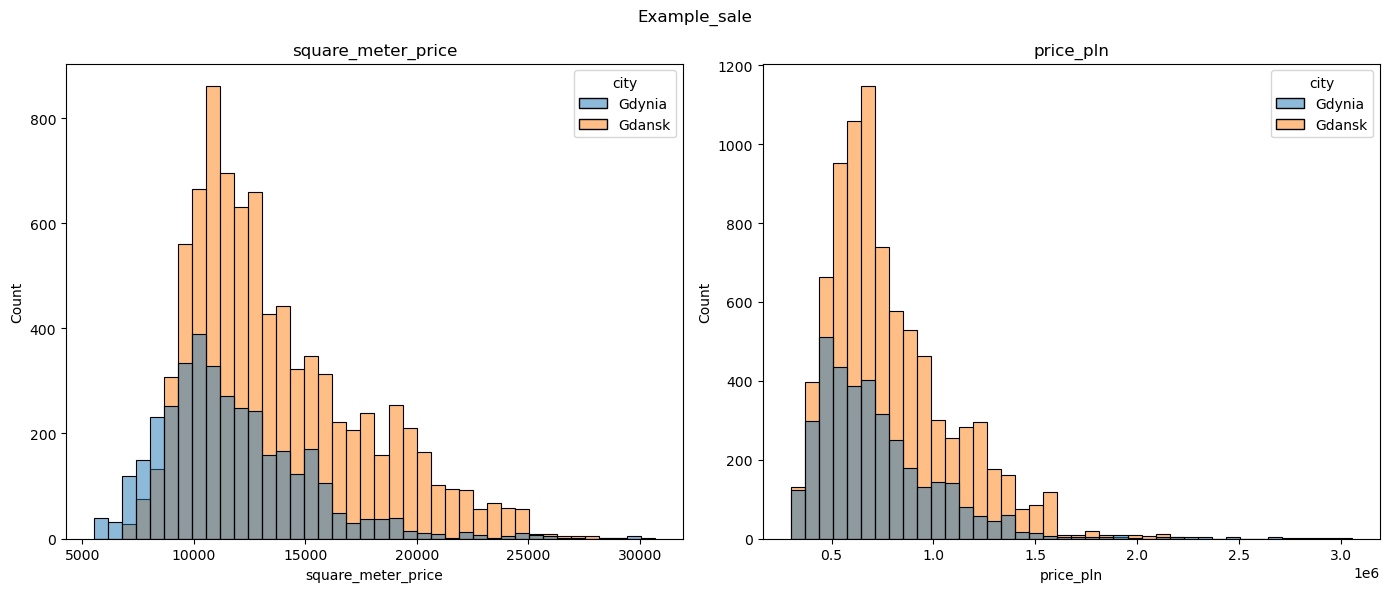

In [12]:
# sale table price distribution

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Example_sale")

sns.histplot(ax=axes[0], data=sale, x="square_meter_price", bins=40, hue="city")
axes[0].set_title("square_meter_price")

sns.histplot(ax=axes[1], data=sale, x="price_pln", bins=40, hue="city")
axes[1].set_title("price_pln")

plt.tight_layout()

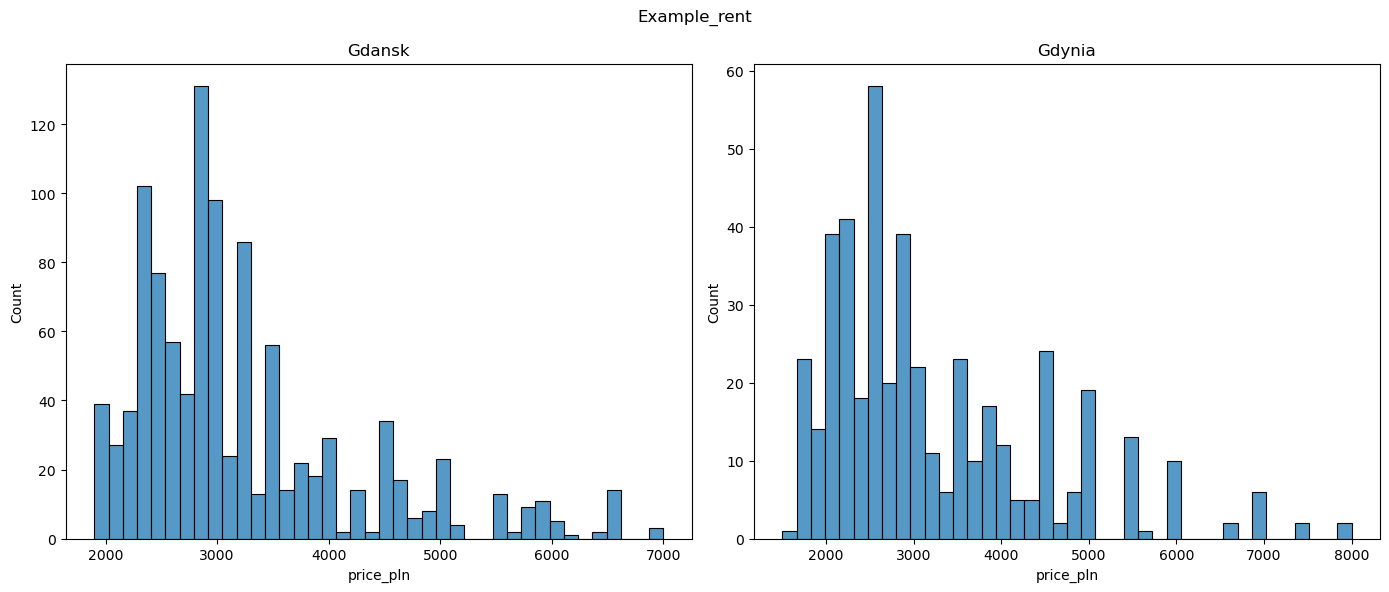

In [13]:
# rent table price distribution

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Example_rent")

sns.histplot(ax=axes[0], data=rent[rent["city"] == "Gdansk"], x="price_pln", bins=40)
axes[0].set_title("Gdansk")

sns.histplot(ax=axes[1], data=rent[rent["city"] == "Gdynia"], x="price_pln", bins=40)
axes[1].set_title("Gdynia")

plt.tight_layout()

#### Correlations

scatterplots

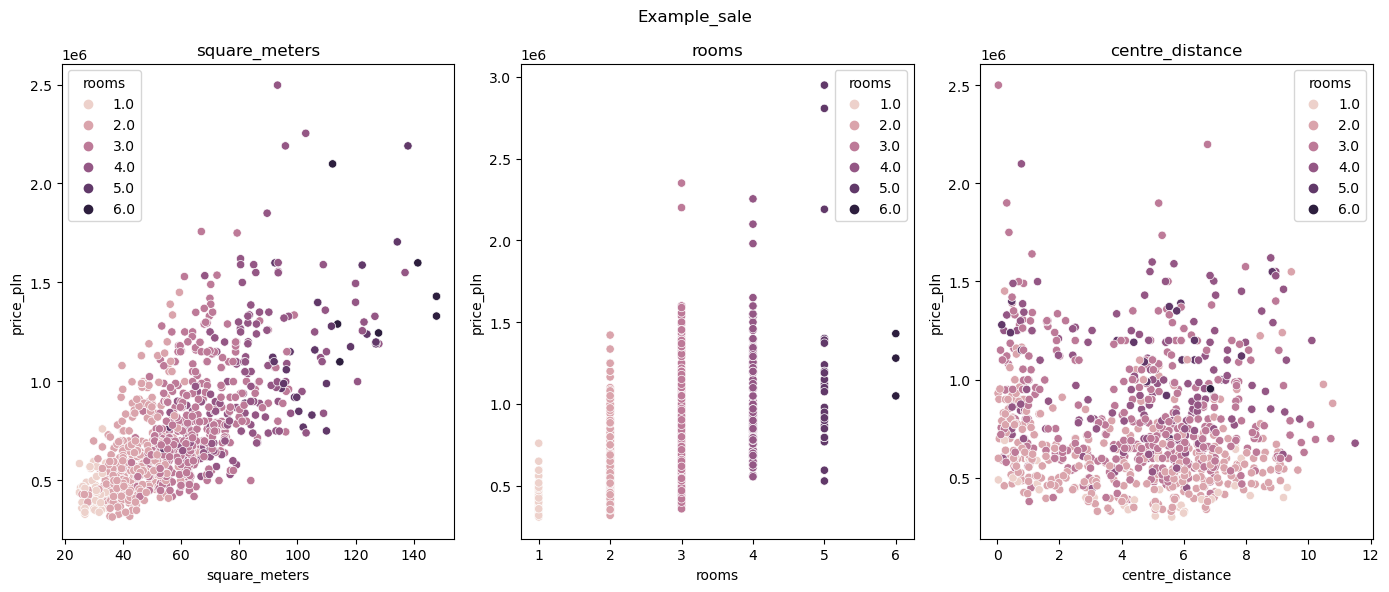

In [14]:
# sale table correlation scatterplots (6)

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle("Example_sale")

sns.scatterplot(ax=axes[0], data=sale.sample(1000), x="square_meters", y="price_pln", hue="rooms")
axes[0].set_title("square_meters")

sns.scatterplot(ax=axes[1], data=sale.sample(1000), x="rooms", y="price_pln", hue="rooms")
axes[1].set_title("rooms")

sns.scatterplot(ax=axes[2], data=sale.sample(1000), x="centre_distance", y="price_pln", hue="rooms")
axes[2].set_title("centre_distance")

plt.tight_layout()

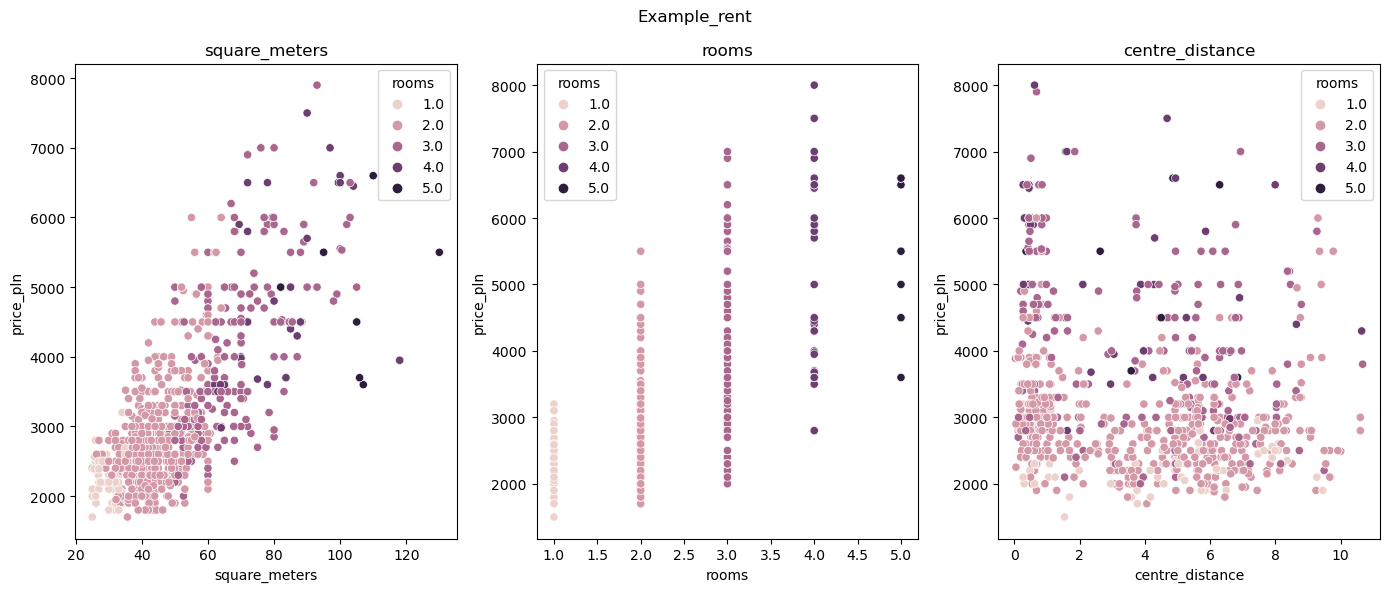

In [15]:
# rent table correlation scatterplots (6)

fig, axes = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle("Example_rent")

sns.scatterplot(ax=axes[0], data=rent.sample(1000), x="square_meters", y="price_pln", hue="rooms")
axes[0].set_title("square_meters")

sns.scatterplot(ax=axes[1], data=rent.sample(1000), x="rooms", y="price_pln", hue="rooms")
axes[1].set_title("rooms")

sns.scatterplot(ax=axes[2], data=rent.sample(1000), x="centre_distance", y="price_pln", hue="rooms")
axes[2].set_title("centre_distance")

plt.tight_layout()

heatmaps

In [16]:
sale_distance = (
    sale.loc[:, ["price_pln", "square_meter_price", "centre_distance", "school_distance", "clinic_distance", "post_office_distance", "kindergarten_distance", "restaurant_distance", "college_distance", "pharmacy_distance"]]
    .fillna({
        "centre_distance": sale["centre_distance"].median(),
        "school_distance": sale["school_distance"].median(),
        "clinic_distance": sale["clinic_distance"].median(),
        "post_office_distance": sale["post_office_distance"].median(),
        "kindergarten_distance": sale["kindergarten_distance"].median(),
        "restaurant_distance": sale["restaurant_distance"].median(),
        "college_distance": sale["college_distance"].median(),
        "pharmacy_distance": sale["pharmacy_distance"].median()
    })
    .corr()
)

rent_distance = (
    rent.loc[:, ["price_pln", "centre_distance", "school_distance", "clinic_distance", "post_office_distance", "kindergarten_distance", "restaurant_distance", "college_distance", "pharmacy_distance"]]
    .fillna({
        "centre_distance": rent["centre_distance"].median(),
        "school_distance": rent["school_distance"].median(),
        "clinic_distance": rent["clinic_distance"].median(),
        "post_office_distance": rent["post_office_distance"].median(),
        "kindergarten_distance": rent["kindergarten_distance"].median(),
        "restaurant_distance": rent["restaurant_distance"].median(),
        "college_distance": rent["college_distance"].median(),
        "pharmacy_distance": rent["pharmacy_distance"].median()
    })
    .corr()
)

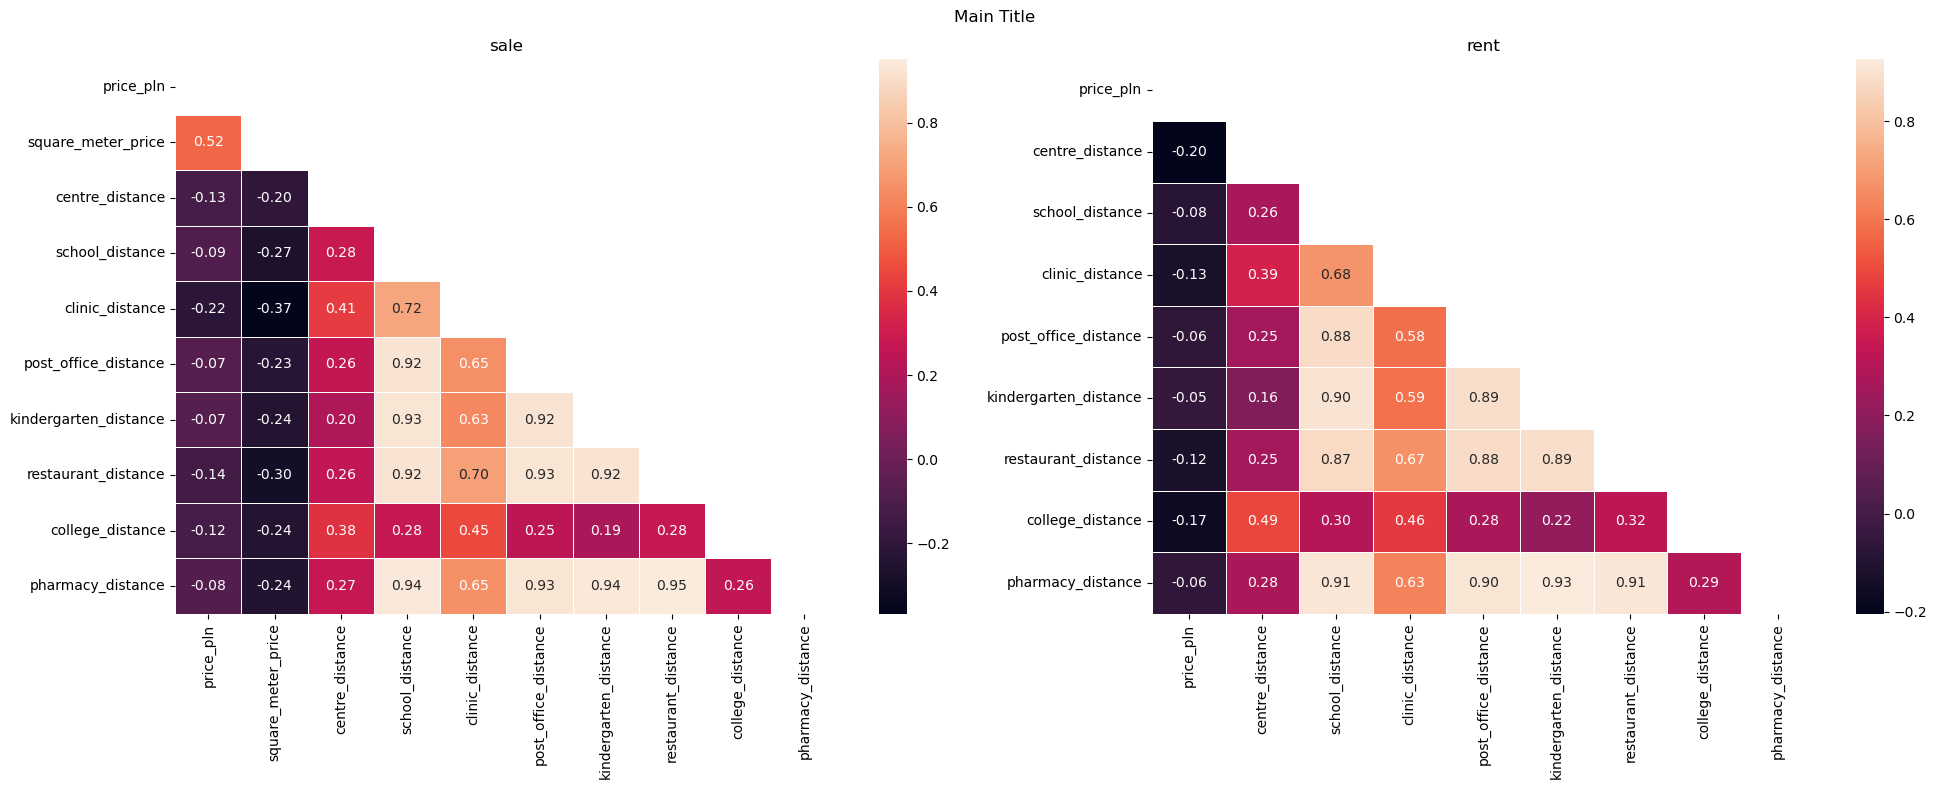

In [17]:
mask_sale = np.triu(np.ones_like(sale_distance, dtype=bool))
mask_rent = np.triu(np.ones_like(rent_distance, dtype=bool))

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Main Title")

sns.heatmap(ax=axes[0], data=sale_distance, annot=True, fmt=".2f", linewidth=.5, mask=mask_sale)
axes[0].set_title("sale")

sns.heatmap(ax=axes[1], data=rent_distance, annot=True, fmt=".2f", linewidth=.5, mask=mask_rent)
axes[1].set_title("rent")

plt.tight_layout()

In [18]:
sale_features = (
    sale.loc[:, ["price_pln", "square_meter_price", "has_parking_space", "has_balcony", "has_elevator", "has_security", "has_storage_room"]]
    .dropna().replace({"yes": 1, "no": 0}).corr()
)

rent_features = (
    rent.loc[:, ["price_pln", "has_parking_space", "has_balcony", "has_elevator", "has_security", "has_storage_room"]]
    .dropna().replace({"yes": 1, "no": 0}).corr()
)

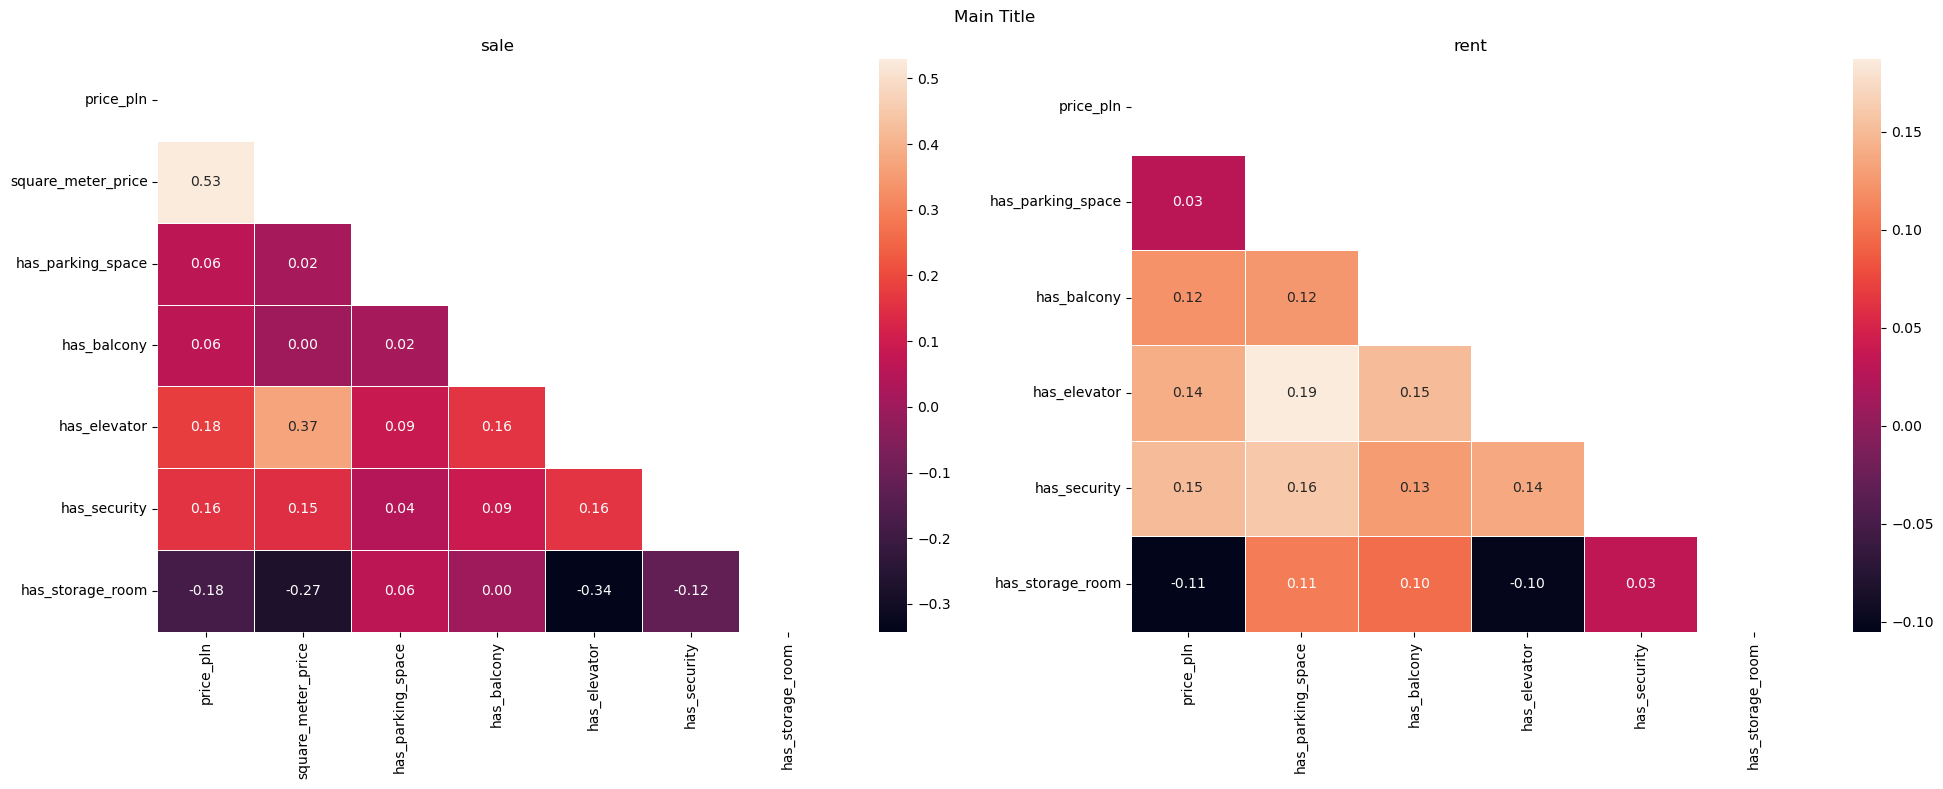

In [19]:
mask_sale = np.triu(np.ones_like(sale_features, dtype=bool))
mask_rent = np.triu(np.ones_like(rent_features, dtype=bool))

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Main Title")

sns.heatmap(ax=axes[0], data=sale_features, annot=True, fmt=".2f", linewidth=.5, mask=mask_sale)
axes[0].set_title("sale")

sns.heatmap(ax=axes[1], data=rent_features, annot=True, fmt=".2f", linewidth=.5, mask=mask_rent)
axes[1].set_title("rent")

plt.tight_layout()

#### Time Series Analysis

In [20]:
# avg sales / rent by month + rooms legend + city

avg_sale = (
    sale.groupby(["month", "month_name", "city", "rooms"])
    .agg(
        avg_sale_price=("price_pln", "mean"),
        avg_sale_square_meter_price=("square_meter_price", "mean")
    )
    .round().sort_values(["month", "rooms"]).reset_index()
)

avg_rent = (
    rent.groupby(["month", "month_name", "city", "rooms"])
    .agg(avg_rent_price=("price_pln", "mean"))
    .round().sort_values(["month", "rooms"]).reset_index()
)

avg_prices = pd.merge(avg_sale, avg_rent, how="left", on=["month", "month_name", "city", "rooms"])
avg_prices.head()

,month,month_name,city,rooms,avg_sale_price,avg_sale_square_meter_price,avg_rent_price
0,8,August,Gdansk,1.0,441186.0,14952.0,NaN
1,8,August,Gdynia,1.0,386875.0,12236.0,NaN
2,8,August,Gdansk,2.0,621758.0,13919.0,NaN
3,8,August,Gdynia,2.0,526950.0,11548.0,NaN
4,8,August,Gdansk,3.0,797599.0,12544.0,NaN


2 rooms analysis

In [21]:
# 2 rooms prices sale + rent / by city + pct_growth

avg_sale_2_rooms = (
    sale.loc[sale["rooms"] == 2]
    .groupby(["month", "month_name", "city"])
    .agg(
        avg_sale_price=("price_pln", "mean"),
        avg_sale_square_meter_price=("square_meter_price", "mean")
    )
    .round().sort_values("month").reset_index()
)

avg_rent_2_rooms = (
    rent.loc[rent["rooms"] == 2]
    .groupby(["month", "month_name", "city"])
    .agg(avg_rent_price=("price_pln", "mean"))
    .round().sort_values("month").reset_index()
)

avg_sale_2_rooms['avg_sale_price_pct_growth'] = (avg_sale_2_rooms.groupby("city")["avg_sale_price"].pct_change() * 100).round(2)
avg_sale_2_rooms['avg_sale_square_meter_price_pct_growth'] = (avg_sale_2_rooms.groupby("city")["avg_sale_square_meter_price"].pct_change() * 100).round(2)
avg_rent_2_rooms['avg_rent_price_pct_growth'] = (avg_rent_2_rooms.groupby("city")["avg_rent_price"].pct_change() * 100).round(2)

avg_prices_2_rooms = pd.merge(avg_sale_2_rooms, avg_rent_2_rooms, how="left", on=["month", "month_name", "city"])
avg_prices_2_rooms

,month,month_name,city,avg_sale_price,avg_sale_square_meter_price,avg_sale_price_pct_growth,avg_sale_square_meter_price_pct_growth,avg_rent_price,avg_rent_price_pct_growth
0,8,August,Gdansk,621758.0,13919.0,NaN,NaN,NaN,NaN
1,8,August,Gdynia,526950.0,11548.0,NaN,NaN,NaN,NaN
2,9,September,Gdansk,643032.0,14327.0,3.42,2.93,NaN,NaN
3,9,September,Gdynia,531388.0,11694.0,0.84,1.26,NaN,NaN
4,10,October,Gdansk,642406.0,14599.0,-0.10,1.90,NaN,NaN
5,10,October,Gdynia,563576.0,12161.0,6.06,3.99,NaN,NaN
6,11,November,Gdansk,653799.0,14725.0,1.77,0.86,2929.0,NaN
7,11,November,Gdynia,565310.0,12329.0,0.31,1.38,2762.0,NaN
8,12,December,Gdansk,697017.0,15619.0,6.61,6.07,2925.0,-0.14
9,12,December,Gdynia,641983.0,13749.0,13.56,11.52,2803.0,1.48


### Export Data for Power BI dashboards